In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

import gym
import d4rl

from rlkit.torch.networks import Mlp
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 10)


No module named 'flow'
(65544) b'X11: The DISPLAY environment variable is missing'
No module named 'carla'


In [2]:
def get_bonus(obs, actions, network, target_network):
    x = torch.from_numpy(obs)
    y = torch.from_numpy(actions)
    data = torch.cat((x, y), dim=1)
    print('size of data:{}'.format(data.size()))
    
    out1 = network(data)
    out2 = target_network(data)
    bonus = abs(out1 - out2)
    print('size of bonus:{}'.format(bonus.size()))
    
    return bonus

In [3]:
def load_models(model_name):
    
    M = 64
    network = Mlp(
        input_size=obs_dim + action_dim,
        output_size=1,
        hidden_sizes=[M, M],
    )

    target_network = Mlp(
    input_size=obs_dim + action_dim,
    output_size=1,
    hidden_sizes=[M, M],
    )
    
    path = '../models/{}'.format(model_name)
    checkpoint = torch.load(path, map_location='cpu')
    network.load_state_dict(checkpoint['network_state_dict'])
    target_network.load_state_dict(checkpoint['target_state_dict'])

    print('Loading model: {}'.format(path))
    
    return network, target_network

In [25]:
num_bins = 100

In [26]:
env_name = 'halfcheetah-medium-v0'

env = gym.make(env_name)
obs_dim = env.observation_space.low.size
action_dim = env.action_space.low.size

print(obs_dim)
print(action_dim)

dataset = env.get_dataset()
obs = dataset['observations']
actions = dataset['actions']
rewards = dataset['rewards']


17
6


/usr/local/google/home/shideh/virtual_env/ML/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [27]:
model_name = 'Nov-03-2020_1648_halfcheetah-medium-v0.pt'
network_1, target_network_1 = load_models(model_name)
bonus_1 = get_bonus(obs, actions, network_1, target_network_1).detach().cpu().numpy()

Loading model: ../models/Nov-03-2020_1648_halfcheetah-medium-v0.pt
size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])


In [28]:
ind = np.random.permutation(actions.shape[0])
shuffled_actions = actions[ind]

random_actions = np.random.rand(actions.shape[0], actions.shape[1]).astype(actions.dtype)

bonus_shuffled_1 = get_bonus(obs, shuffled_actions, network_1, target_network_1).detach().cpu().numpy()
bonus_random_1 = get_bonus(obs, random_actions, network_1, target_network_1).detach().cpu().numpy()


size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])
size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])


In [29]:
reward_rng = max(rewards) - min(rewards)
bonus_rng = max(bonus_1) - min(bonus_1)

print('range bonus:{}, rewards:{}'.format(bonus_rng, reward_rng))

range bonus:[0.00454132], rewards:10.932053565979004


In [30]:
scale = reward_rng / bonus_rng
w = 2.5
beta = w * scale
print('scale:{}'.format(scale))
print('beta:{}'.format(w * scale))

scale:[2407.2402]
beta:[6018.1006]


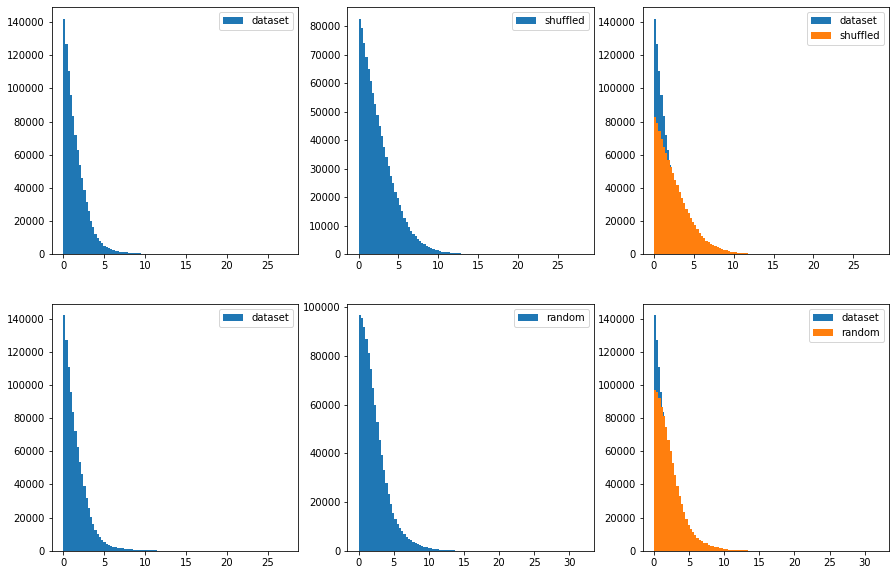

In [31]:
# ax1, ax2, ax3, ax4, ax5, ax6 = plt.subplots(2, 3, figsize=(15, 5), sharey=True)

plt.subplot(2, 3, 1)
plt.hist(beta * bonus_1, bins = num_bins, label='dataset')
plt.legend()

plt.subplot(2, 3, 2)
plt.hist(beta * bonus_shuffled_1, bins = num_bins, label='shuffled')
plt.legend()

plt.subplot(2, 3, 3)
plt.hist(beta * bonus_1, bins = num_bins, label='dataset')
plt.hist(beta * bonus_shuffled_1, bins = num_bins, label='shuffled')
plt.legend(loc='upper right')


plt.subplot(2, 3, 4)
plt.hist(beta * bonus_1, bins = num_bins, label='dataset')
plt.legend()

plt.subplot(2, 3, 5)
plt.hist(beta * bonus_random_1, bins = num_bins, label='random')
plt.legend()

plt.subplot(2, 3, 6)
plt.hist(beta * bonus_1, bins = num_bins, label='dataset')
plt.hist(beta * bonus_random_1, bins = num_bins, label='random')
plt.legend(loc='upper right')

## hopper-medium

In [16]:
env_name = 'hopper-medium-v0'

env = gym.make(env_name)
obs_dim = env.observation_space.low.size
action_dim = env.action_space.low.size

print(obs_dim)
print(action_dim)

dataset = env.get_dataset()
obs = dataset['observations']
actions = dataset['actions']
rewards = dataset['rewards']

11
3


In [17]:
model_name = 'Nov-09-2020_1517_hopper-medium-v0.pt'
network_1, target_network_1 = load_models(model_name)
bonus_1 = get_bonus(obs, actions, network_1, target_network_1).detach().cpu().numpy()

Loading model: ../models/Nov-09-2020_1517_hopper-medium-v0.pt
size of data:torch.Size([1000000, 14])
size of bonus:torch.Size([1000000, 1])


In [18]:
reward_rng = max(rewards) - min(rewards)
bonus_rng = max(bonus_1) - min(bonus_1)

print('range bonus:{}, rewards:{}'.format(bonus_rng, reward_rng))

range bonus:[0.00094356], rewards:5.25816535949707


In [19]:
scale = reward_rng / bonus_rng
w = 2.5
beta = scale * w
print('scale:{}'.format(scale))
print('beta:{}'.format(w * scale))

scale:[5572.6934]
beta:[13931.733]


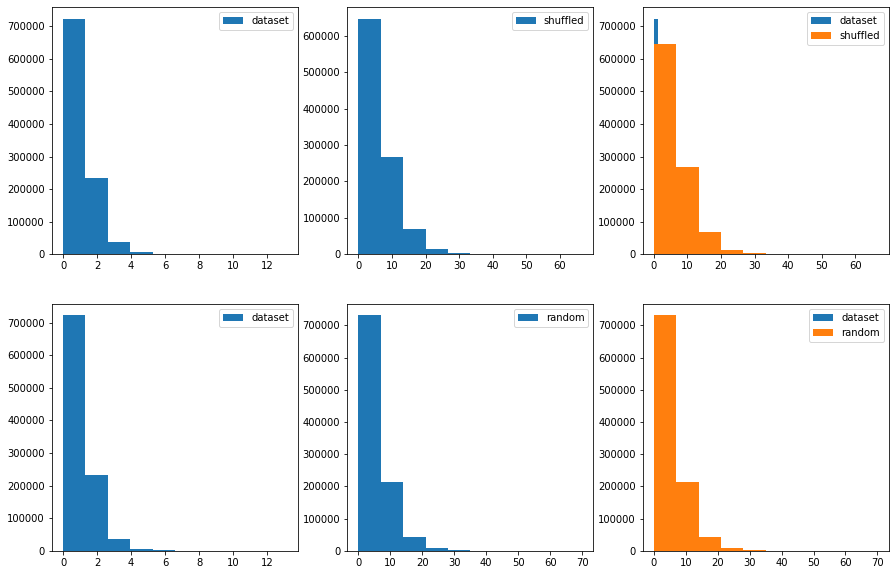

In [20]:
plt.subplot(2, 3, 1)
plt.hist(beta * bonus_1, bins = num_bins, label='dataset')
plt.legend()

plt.subplot(2, 3, 2)
plt.hist(beta * bonus_shuffled_1, bins = num_bins, label='shuffled')
plt.legend()

plt.subplot(2, 3, 3)
plt.hist(beta * bonus_1, bins = num_bins, label='dataset')
plt.hist(beta * bonus_shuffled_1, bins = num_bins, label='shuffled')
plt.legend(loc='upper right')


plt.subplot(2, 3, 4)
plt.hist(beta * bonus_1, bins = num_bins, label='dataset')
plt.legend()

plt.subplot(2, 3, 5)
plt.hist(beta * bonus_random_1, bins = num_bins, label='random')
plt.legend()

plt.subplot(2, 3, 6)
plt.hist(beta * bonus_1, bins = num_bins, label='dataset')
plt.hist(beta * bonus_random_1, bins = num_bins, label='random')
plt.legend(loc='upper right')

## Walker2d-medium


In [32]:
env_name = 'walker2d-medium-v0'

env = gym.make(env_name)
obs_dim = env.observation_space.low.size
action_dim = env.action_space.low.size

print(obs_dim)
print(action_dim)

17
6


In [33]:
dataset = env.get_dataset()
obs = dataset['observations']
actions = dataset['actions']
rewards = dataset['rewards']

In [34]:
model_name_1 = 'Nov-19-2020_1043_walker2d-medium-v0.pt'
model_name_2 = 'Nov-19-2020_1357_walker2d-medium-v0.pt'
network_1, target_network_1 = load_models(model_name_1)
network_2, target_network_2 = load_models(model_name_2)



Loading model: ../models/Nov-19-2020_1043_walker2d-medium-v0.pt
Loading model: ../models/Nov-19-2020_1357_walker2d-medium-v0.pt


In [35]:
bonus_1 = get_bonus(obs, actions, network_1, target_network_1).detach().cpu().numpy()
bonus_2 = get_bonus(obs, actions, network_2, target_network_2).detach().cpu().numpy()

size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])
size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])


In [36]:
reward_rng = max(rewards) - min(rewards)
bonus_rng_1 = max(bonus_1) - min(bonus_1)
bonus_rng_2 = max(bonus_2) - min(bonus_2)

print('range bonus1:{}, range bonus2:{},rewards:{}'.format(bonus_rng_1, bonus_rng_2, reward_rng))



range bonus1:[0.00542762], range bonus2:[0.01152945],rewards:14.513020515441895


In [37]:
scale = reward_rng / bonus_rng_1
w = 2.5
beta = w * scale
print('scale:{}'.format(scale))
print('beta:{}'.format(beta))

scale:[2673.9214]
beta:[6684.8037]


In [38]:
scale = reward_rng / bonus_rng_2
w = 2.5
beta = w * scale
print('scale:{}'.format(scale))
print('beta:{}'.format(beta))

scale:[1258.7777]
beta:[3146.9443]


In [39]:
ind = np.random.permutation(actions.shape[0])
shuffled_actions = actions[ind]

random_actions = np.random.rand(actions.shape[0], actions.shape[1]).astype(actions.dtype)

bonus_shuffled_1 = get_bonus(obs, shuffled_actions, network_1, target_network_1).detach().cpu().numpy()
bonus_shuffled_2 = get_bonus(obs, shuffled_actions, network_2, target_network_2).detach().cpu().numpy()

bonus_random_1 = get_bonus(obs, random_actions, network_1, target_network_1).detach().cpu().numpy()
bonus_random_2 = get_bonus(obs, random_actions, network_2, target_network_2).detach().cpu().numpy()


size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])
size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])
size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])
size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])


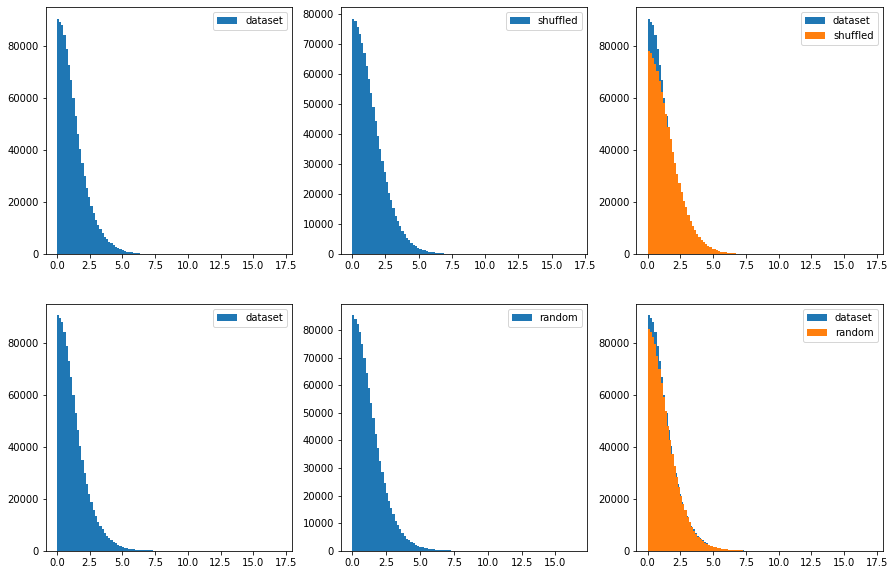

In [40]:
plt.subplot(2, 3, 1)
plt.hist(beta * bonus_1, bins = num_bins, label='dataset')
plt.legend()

plt.subplot(2, 3, 2)
plt.hist(beta * bonus_shuffled_1, bins = num_bins, label='shuffled')
plt.legend()

plt.subplot(2, 3, 3)
plt.hist(beta * bonus_1, bins = num_bins, label='dataset')
plt.hist(beta * bonus_shuffled_1, bins = num_bins, label='shuffled')
plt.legend(loc='upper right')


plt.subplot(2, 3, 4)
plt.hist(beta * bonus_1, bins = num_bins, label='dataset')
plt.legend()

plt.subplot(2, 3, 5)
plt.hist(beta * bonus_random_1, bins = num_bins, label='random')
plt.legend()

plt.subplot(2, 3, 6)
plt.hist(beta * bonus_1, bins = num_bins, label='dataset')
plt.hist(beta * bonus_random_1, bins = num_bins, label='random')
plt.legend(loc='upper right')

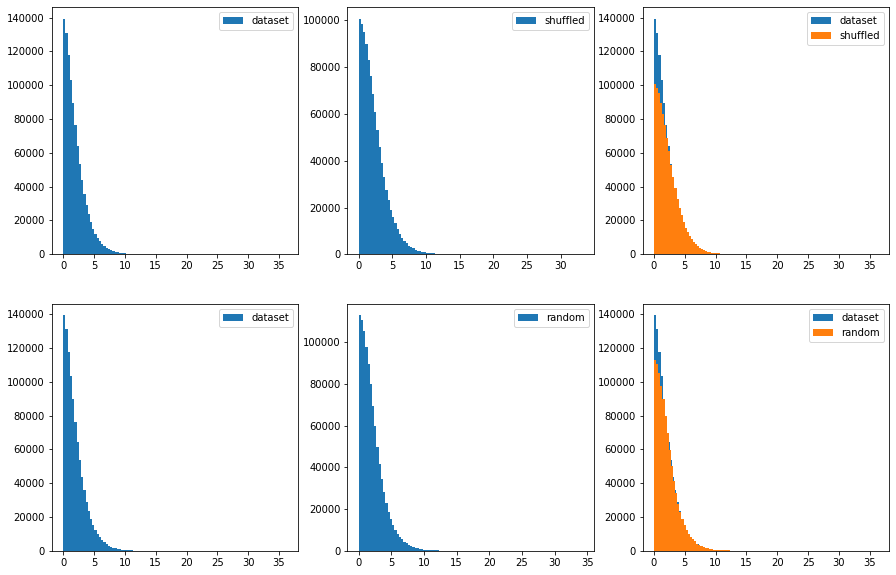

In [41]:
plt.subplot(2, 3, 1)
plt.hist(beta * bonus_2, bins = num_bins, label='dataset')
plt.legend()

plt.subplot(2, 3, 2)
plt.hist(beta * bonus_shuffled_2, bins = num_bins, label='shuffled')
plt.legend()

plt.subplot(2, 3, 3)
plt.hist(beta * bonus_2, bins = num_bins, label='dataset')
plt.hist(beta * bonus_shuffled_2, bins = num_bins, label='shuffled')
plt.legend(loc='upper right')


plt.subplot(2, 3, 4)
plt.hist(beta * bonus_2, bins = num_bins, label='dataset')
plt.legend()

plt.subplot(2, 3, 5)
plt.hist(beta * bonus_random_2, bins = num_bins, label='random')
plt.legend()

plt.subplot(2, 3, 6)
plt.hist(beta * bonus_2, bins = num_bins, label='dataset')
plt.hist(beta * bonus_random_2, bins = num_bins, label='random')
plt.legend(loc='upper right')

## normalizng the obs and actions

In [15]:
obs_normalized = (obs - obs.mean(axis=0)) / obs.std(axis=0)
actions_normalized = (actions - actions.mean(axis=0)) / actions.std(axis=0)

In [21]:
model_name_1 = 'Nov-23-2020_1142_walker2d-medium-v0.pt'
model_name_1 = 'Nov-23-2020_1150_walker2d-medium-v0.pt'

network_1, target_network_1 = load_models(model_name_1)

Loading model: ../models/Nov-23-2020_1150_walker2d-medium-v0.pt


In [22]:
bonus_1 = get_bonus(obs_normalized, actions_normalized, network_1, target_network_1).detach().cpu().numpy()

ind = np.random.permutation(actions_normalized.shape[0])
shuffled_actions = actions_normalized[ind]

random_actions = np.random.rand(actions_normalized.shape[0], actions.shape[1]).astype(actions.dtype)

bonus_shuffled_1 = get_bonus(obs_normalized, shuffled_actions, network_1, target_network_1).detach().cpu().numpy()
bonus_random_1 = get_bonus(obs_normalized, random_actions, network_1, target_network_1).detach().cpu().numpy()


size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])
size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])
size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])


In [23]:
beta = 1e4

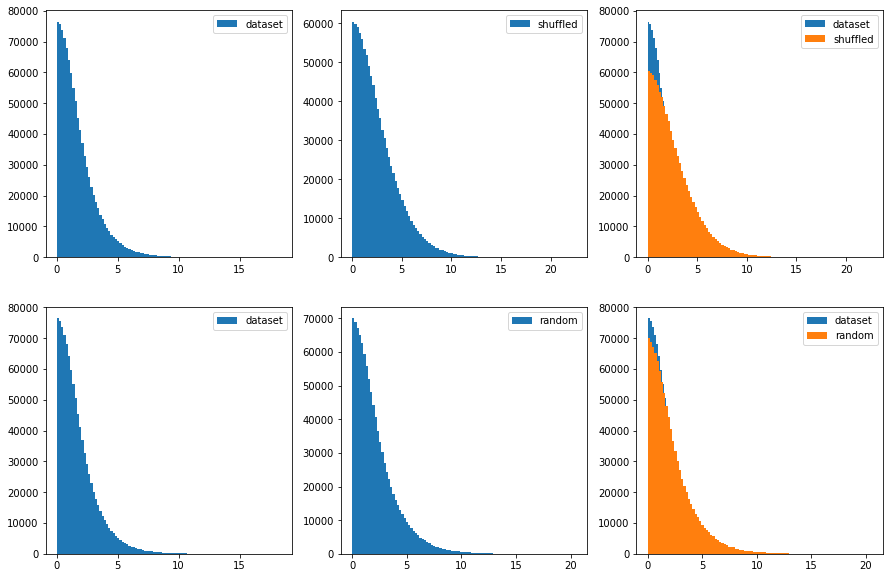

In [24]:
plt.subplot(2, 3, 1)
plt.hist(beta * bonus_1, bins = num_bins, label='dataset')
plt.legend()

plt.subplot(2, 3, 2)
plt.hist(beta * bonus_shuffled_1, bins = num_bins, label='shuffled')
plt.legend()

plt.subplot(2, 3, 3)
plt.hist(beta * bonus_1, bins = num_bins, label='dataset')
plt.hist(beta * bonus_shuffled_1, bins = num_bins, label='shuffled')
plt.legend(loc='upper right')


plt.subplot(2, 3, 4)
plt.hist(beta * bonus_1, bins = num_bins, label='dataset')
plt.legend()

plt.subplot(2, 3, 5)
plt.hist(beta * bonus_random_1, bins = num_bins, label='random')
plt.legend()

plt.subplot(2, 3, 6)
plt.hist(beta * bonus_1, bins = num_bins, label='dataset')
plt.hist(beta * bonus_random_1, bins = num_bins, label='random')
plt.legend(loc='upper right')